# 01 Example - Property Scans with Point Data

In [10]:
import pyscan as ps
import numpy as np
import matplotlib.pyplot as plt

## Setup devices

In [11]:
devices = ps.ItemAttribute()

devices.v1 = ps.TestVoltage() # Device 1
devices.v2 = ps.TestVoltage() # Device 2
devices.v3 = ps.TestVoltage() # Device 3

## Define a measure function

In [12]:
def get_voltage_data(expt):
    """
    Reads the voltage from v1, v2, and v3 devices. Also adds a calculated value vsum.
    """

    runinfo = expt.runinfo
    devices = expt.devices

    d = ps.ItemAttribute()

    d.v1_readout = devices.v1.voltage
    d.v2_readout = devices.v2.voltage
    d.v3_readout = devices.v3.voltage

    d.vsum = d.v1_readout + d.v2_readout + d.v3_readout
    
    return d

## Experiments

### 1. 1D Scan, point data

In [13]:
# Create RunInfo instance and set scan0 to PropertyScan
runinfo = ps.RunInfo()
runinfo.scan0 = ps.PropertyScan({'v1': ps.drange(0, 0.1, 1)}, prop='voltage', dt=0.01)

# Set RunInfo measure_function (remember, it takes a Experiment object as a parameter and 
# returns an ItemAttribute containing data). This function is run every time the experiment iterates one scan variable.
runinfo.measure_function = get_voltage_data

# Create a Experiment class with the RunInfo and Devices just created
expt = ps.Experiment(runinfo, devices, time=True)
expt.start_thread()


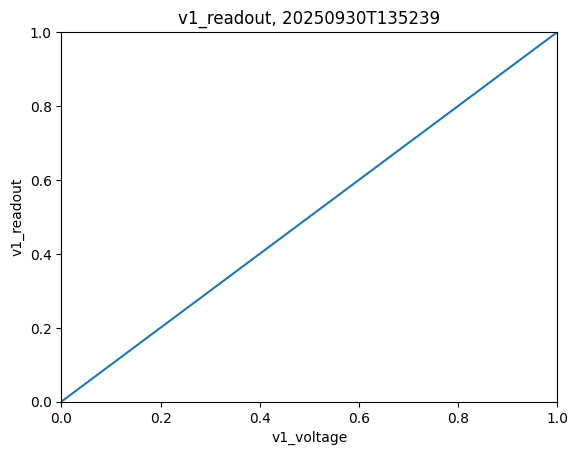

In [14]:
ps.live_plot1D(expt, data_name="v1_readout")

### 2. 2D Scan, point data

In [15]:
# Create RunInfo instance and set scan0 and scan1 to PropertyScan
runinfo = ps.RunInfo()
runinfo.scan0 = ps.PropertyScan({'v1': ps.drange(0, 0.05, 1)}, prop='voltage', dt=0.01)
runinfo.scan1 = ps.PropertyScan({'v2': ps.drange(0, 0.1, 1)}, prop='voltage', dt=0.01)

runinfo.measure_function = get_voltage_data

expt = ps.Experiment(runinfo, devices)
expt.start_thread()


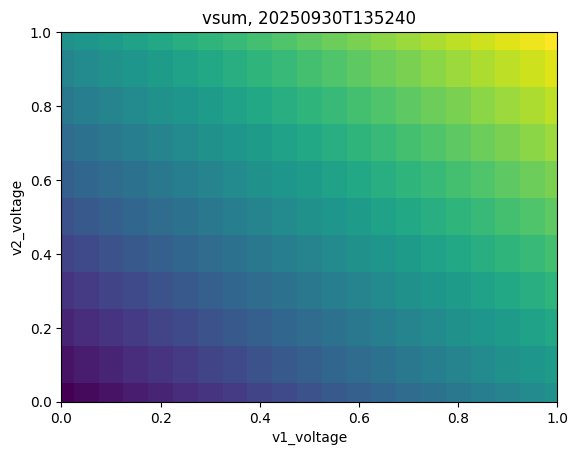

In [16]:
ps.live_plot2D(expt, data_name="vsum")

### 3. 2D Scan with 2 instruments in scan0, point data

This is useful to change two properties at once. For example, changing a variable on two different devices, simultaneously.

In [17]:
# 2D data, 2 instruments in scan0
runinfo = ps.RunInfo()
runinfo.scan0 = ps.PropertyScan({'v1': ps.drange(0, 0.1, 1),
                                 'v3': ps.drange(5, -0.2, 3)}, prop='voltage', dt=0.01)
runinfo.scan1 = ps.PropertyScan({'v2': ps.drange(0, 0.2, 1)}, prop='voltage', dt=0.01)

runinfo.measure_function = get_voltage_data

# This is the only important difference
expt = ps.Experiment(runinfo, devices)
expt.start_thread()


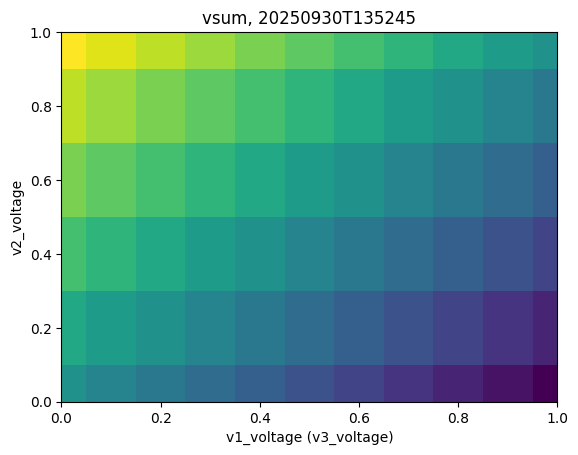

In [18]:
ps.live_plot2D(expt, data_name="vsum")